In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import numpy as np
from numpy import argmax
import glob
import re

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve

In [ ]:
# FA up to 6Y

df = pd.read_csv('Z:\\Tami - summaries\\pred_FA_6Y.csv')
df

,Unnamed: 0,CustomerKey_Encrypt,FA_6YO,birth_year,Gender,urban,SES_group,infant_AD,birth_season,sys_antbtc_1Y,top_antbtc_1Y,family.smoke,Number.of.Siblings,FA.Sib,Percent.atopic.sblng,First.Born,atopic_parent,FA_parent,systemic.Antibiotics_G
0,1,00005A8A244422699216118399B17402D02007A32DA58D...,0,2007,1,0,1,0,Winter,0,0,0,2,0,0.0,0,0,0,0
1,2,0000B0D61D3865CFAC21B96BB15844ADC9456D6D1011AD...,0,2009,0,1,3,0,spring,0,0,0,1,0,1.0,0,0,0,0
2,3,0002BB7D9A3D20E8F02C2A3FAB660532C469EE58846CA1...,0,2010,1,0,1,0,Summer,0,0,0,1,0,0.0,0,0,0,0
3,4,00031E6E8D1405615AEFBD165D913F107DF2FF41B3CD3F...,0,2015,0,1,1,0,Winter,0,0,0,2,0,0.0,0,0,0,1
4,5,0007B82CB826C768590651DC5FB865C29C54FEC339DFC2...,0,2013,0,1,1,0,Autumn,0,0,0,4,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76110,76111,FFF8D2352CFED4D8895ECF40E9A469642F8703EF4B8372...,0,2007,0,0,1,0,Winter,0,0,0,0,0,0.0,1,0,0,0
76111,76112,FFF8D614500C716992D558F548599434DCF40D1EC95A55...,0,2008,1,0,1,0,spring,0,0,0,2,0,0.0,0,0,0,0
76112,76113,FFFF0C732FDA3E82B7F8CA0F212FE917D771636A3715FE...,0,2016,0,1,4,0,Summer,1,0,0,1,0,0.0,0,0,0,0
76113,76114,FFFF2DD29A67563A8F81C8AEF7FEBAA4B7ED3FBF9A3A5F...,0,2005,1,0,3,0,Autumn,0,0,1,0,0,0.0,1,0,0,0


In [ ]:
# FA up to 6Y without siblings in the data set

df = pd.read_csv('Z:\\Tami - summaries\\FA_6Y_no_sblng.csv')
df

,Unnamed: 0,CustomerKey_Encrypt,FA_6YO,birth_year,Gender,urban,SES_group,infant_AD,birth_season,sys_antbtc_1Y,top_antbtc_1Y,family.smoke,Number.of.Siblings,FA.Sib,Percent.atopic.sblng,First.Born,atopic_parent,FA_parent
0,1,00005A8A244422699216118399B17402D02007A32DA58D...,0,2007,1,0,1,0,Winter,0,0,0,2,0,0.0,0,0,0
1,2,0000B0D61D3865CFAC21B96BB15844ADC9456D6D1011AD...,0,2009,0,1,3,0,spring,0,0,0,1,0,1.0,0,0,0
2,3,0002BB7D9A3D20E8F02C2A3FAB660532C469EE58846CA1...,0,2010,1,0,1,0,Summer,0,0,0,1,0,0.0,0,0,0
3,4,00031E6E8D1405615AEFBD165D913F107DF2FF41B3CD3F...,0,2015,0,1,1,0,Winter,0,0,0,2,0,0.0,0,0,0
4,5,0007D618BC9C8B5EEDD6CF187177DA445C1525F1D7F066...,0,2009,1,0,2,0,Autumn,0,0,0,1,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62901,76105,FFEE520109421D56910032F0650F31F20AAB04F659377D...,0,2006,0,1,3,0,Summer,0,0,0,0,0,0.0,1,0,0
62902,76107,FFF32578E46B897EA1CFD7B48DE25759908EE8020DA6CE...,0,2010,0,1,4,0,Autumn,0,0,0,0,0,0.0,1,1,0
62903,76111,FFF8D2352CFED4D8895ECF40E9A469642F8703EF4B8372...,0,2007,0,0,1,0,Winter,0,0,0,0,0,0.0,1,0,0
62904,76114,FFFF2DD29A67563A8F81C8AEF7FEBAA4B7ED3FBF9A3A5F...,0,2005,1,0,3,0,Autumn,0,0,1,0,0,0.0,1,0,0


In [ ]:
df

,Unnamed: 0,CustomerKey_Encrypt,FA_6YO,birth_year,Gender,urban,SES_group,infant_AD,birth_season,sys_antbtc_1Y,top_antbtc_1Y,family.smoke,Number.of.Siblings,FA.Sib,Percent.atopic.sblng,First.Born,atopic_parent,FA_parent,systemic.Antibiotics_G
0,1,00005A8A244422699216118399B17402D02007A32DA58D...,0,2007,1,0,1,0,Winter,0,0,0,2,0,0.0,0,0,0,0
1,2,0000B0D61D3865CFAC21B96BB15844ADC9456D6D1011AD...,0,2009,0,1,3,0,spring,0,0,0,1,0,1.0,0,0,0,0
2,3,0002BB7D9A3D20E8F02C2A3FAB660532C469EE58846CA1...,0,2010,1,0,1,0,Summer,0,0,0,1,0,0.0,0,0,0,0
3,4,00031E6E8D1405615AEFBD165D913F107DF2FF41B3CD3F...,0,2015,0,1,1,0,Winter,0,0,0,2,0,0.0,0,0,0,1
4,5,0007B82CB826C768590651DC5FB865C29C54FEC339DFC2...,0,2013,0,1,1,0,Autumn,0,0,0,4,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76110,76111,FFF8D2352CFED4D8895ECF40E9A469642F8703EF4B8372...,0,2007,0,0,1,0,Winter,0,0,0,0,0,0.0,1,0,0,0
76111,76112,FFF8D614500C716992D558F548599434DCF40D1EC95A55...,0,2008,1,0,1,0,spring,0,0,0,2,0,0.0,0,0,0,0
76112,76113,FFFF0C732FDA3E82B7F8CA0F212FE917D771636A3715FE...,0,2016,0,1,4,0,Summer,1,0,0,1,0,0.0,0,0,0,0
76113,76114,FFFF2DD29A67563A8F81C8AEF7FEBAA4B7ED3FBF9A3A5F...,0,2005,1,0,3,0,Autumn,0,0,1,0,0,0.0,1,0,0,0


In [ ]:
df.shape

(76115, 19)

In [ ]:
list(df.columns)[1:]

['CustomerKey_Encrypt',
 'FA_6YO',
 'birth_year',
 'Gender',
 'urban',
 'SES_group',
 'infant_AD',
 'birth_season',
 'sys_antbtc_1Y',
 'top_antbtc_1Y',
 'family.smoke',
 'Number.of.Siblings',
 'FA.Sib',
 'Percent.atopic.sblng',
 'First.Born',
 'atopic_parent',
 'FA_parent',
 'systemic.Antibiotics_G']

In [ ]:
print (df.FA_6YO.value_counts())

0    73174
1     2941
Name: FA_6YO, dtype: int64


In [ ]:
Season_dum = pd.get_dummies(df['birth_season'])
df = pd.concat([df, Season_dum], axis=1, join='inner')

SES_dum = pd.get_dummies(df['SES_group'])
df = pd.concat([df, SES_dum], axis=1, join='inner')

In [ ]:
df = df.rename(columns={#"systemic.Steroids":"Systemic Steroids During Pregnancy",
                        #  "topicaly.Antibiotics":"Topical Antibiotics During Pregnancy",
                        "FA_6YO": "Cohort", #
                          "Summer":"Season of birth: Summer",
                          "Winter":"Season of birth: Winter",
                          "Autumn":"Season of birth: Autumn",
                          "FA.Sib":"Sibling Food Allergies", #
                          "atopic_parent":"Parent Atopic Condition",
                          "FA_parent":"Parent Food Allergy",
                          "infant_AD":"Infant Atopic Dermatitis", #
                          "Percent.atopic.sblng":"Percent of Siblings with Atopic", #
                       'sys_antbtc_1Y':"Infant Systemic Antibiotics", #   ""
                       'top_antbtc_1Y':"Infant Topical Antibiotics", #
                       "First.Born":"First Born", #
                        "family.smoke":"Smoking",
                        "urban":"Urban",
                        1:"Very low SES",
                         2:"Low SES",
                         3:"Medium SES",
                         4:"High SES",
                        "systemic.Antibiotics_G":"Antibiotics During Pregnancy"
                       })

In [ ]:
df['birth_year'].value_counts()

2012    6307
2013    6240
2010    6228
2011    6199
2014    6147
2009    6096
2008    6017
2015    5954
2007    5924
2005    5868
2006    5864
2016    5854
2004    2130
2003     410
2002     389
2001     261
2000     227
Name: birth_year, dtype: int64

In [ ]:
df = df[(df['birth_year']>=2005)]
print(df.Cohort.value_counts(normalize=True))
print(df.Cohort.value_counts(normalize=False))

0    0.961044
1    0.038956
Name: Cohort, dtype: float64
0    69866
1     2832
Name: Cohort, dtype: int64


In [ ]:
### Full FA Model ###
y = df.Cohort

X = df[['Gender',
 'Urban',
# "Very low SES",
##'Low SES',
# 'Medium SES',
# 'High SES',
 'Smoking',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
 'Infant Systemic Antibiotics', # variable post birth
# 'Infant Topical Antibiotics',  # variable post birth
#  'Antibiotics During Pregnancy',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]]

X = X.apply(pd.to_numeric)

In [ ]:

from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=1) # 70% training and 30% test



In [ ]:
#balancing

from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=1) # 70% training and 30% test


pos = df[(df['Cohort']==1)]
pos = pos.sample(n=int(len(pos)*0.7), random_state=35 )
neg = df[(df['Cohort']==0)]
neg = neg.sample(n=int(len(pos)*10), random_state=35 )

X_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
y_train = X_train['Cohort']
X_train = X_train[X.columns]

print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(y_test.value_counts(normalize=False))
print(df.Cohort.value_counts(normalize=True))
print(df.Cohort.value_counts(normalize=False))

0    19820
1     1982
Name: Cohort, dtype: int64
0    0.909091
1    0.090909
Name: Cohort, dtype: float64
0    0.960569
1    0.039431
Name: Cohort, dtype: float64
0    20950
1      860
Name: Cohort, dtype: int64
0    0.961044
1    0.038956
Name: Cohort, dtype: float64
0    69866
1     2832
Name: Cohort, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,auc, classification_report


#rf = RandomForestClassifier(n_estimators=60, max_features='sqrt', max_depth=25, random_state=35)
#rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=15, random_state=35)

rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)
TH = 0.25
y_pred = (rf.predict(X_test) > TH).astype('float')


#model result
rf_matrix = confusion_matrix(y_test, y_pred)
print(rf_matrix)
#print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, rf.predict(X_test)))

[[19605  1345]
 [  494   366]]
Accuracy: 0.9156808803301238
Precision: 0.21390999415546463
Recall: 0.4255813953488372
roc_auc_score: 0.8069101959260698


In [ ]:
#y_pred = rf.predict(X_test)

#auc_6c = pd.DataFrame(np.column_stack([y_pred,y_test]),
#                      columns=['6c_y_pred','6c_y_test'])

#auc_6c.to_csv('Z:\\Tami - summaries\\auc_6c.csv')

#### Confidence Interval for AUC (3 types of calcaultaion)

In [ ]:
# Statistical Calcultation

from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci (y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true,y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2-AUC)
    Q2 = 2*AUC**2 / (1+AUC)
    SE_AUC = sqrt((AUC*(1-AUC) + (N1-1)*(Q1-AUC**2)+(N2-1)*(Q2-AUC**2))/(N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower <0:
        lower=0
    if upper >1:
        upper=1
    return (round(lower,2),round(upper,2))

In [ ]:
roc_auc_ci (y_test, rf.predict(X_test), positive=1)

(0.78, 0.82)

In [ ]:
# Bootstrap Calculation #

from scipy.stats import sem

ytest = y_test
ytest_len = len(ytest)
indices = range(ytest_len)
ytest.index = indices

model = rf

y_pred = model.predict(X_test)

n_bootstraps = 1000
rng_seed = 42
bootstraped_scores = []

print ("Original AUC: {:0.3f}".format(roc_auc_score(ytest,y_pred)))

rng = np.random.RandomState(rng_seed)
for i in range (n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    score = roc_auc_score(ytest[indices], y_pred[indices])
    bootstraped_scores.append(score)
    print("Bootstrap #{} AUC: {:0.3f}".format(i+1,score))


Original AUC: 0.802
Bootstrap #1 AUC: 0.799
Bootstrap #2 AUC: 0.807
Bootstrap #3 AUC: 0.805
Bootstrap #4 AUC: 0.790
Bootstrap #5 AUC: 0.801
Bootstrap #6 AUC: 0.790
Bootstrap #7 AUC: 0.796
Bootstrap #8 AUC: 0.795
Bootstrap #9 AUC: 0.792
Bootstrap #10 AUC: 0.800
Bootstrap #11 AUC: 0.813
Bootstrap #12 AUC: 0.801
Bootstrap #13 AUC: 0.808
Bootstrap #14 AUC: 0.801
Bootstrap #15 AUC: 0.812
Bootstrap #16 AUC: 0.807
Bootstrap #17 AUC: 0.808
Bootstrap #18 AUC: 0.802
Bootstrap #19 AUC: 0.802
Bootstrap #20 AUC: 0.796
Bootstrap #21 AUC: 0.799
Bootstrap #22 AUC: 0.809
Bootstrap #23 AUC: 0.783
Bootstrap #24 AUC: 0.791
Bootstrap #25 AUC: 0.798
Bootstrap #26 AUC: 0.807
Bootstrap #27 AUC: 0.799
Bootstrap #28 AUC: 0.804
Bootstrap #29 AUC: 0.813
Bootstrap #30 AUC: 0.808
Bootstrap #31 AUC: 0.813
Bootstrap #32 AUC: 0.797
Bootstrap #33 AUC: 0.798
Bootstrap #34 AUC: 0.795
Bootstrap #35 AUC: 0.802
Bootstrap #36 AUC: 0.799
Bootstrap #37 AUC: 0.798
Bootstrap #38 AUC: 0.799
Bootstrap #39 AUC: 0.784
Bootstrap #40 

In [ ]:
sorted_scores = np.array(bootstraped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]

print(confidence_lower, confidence_upper)

0.7890837248459267 0.8150671061304918


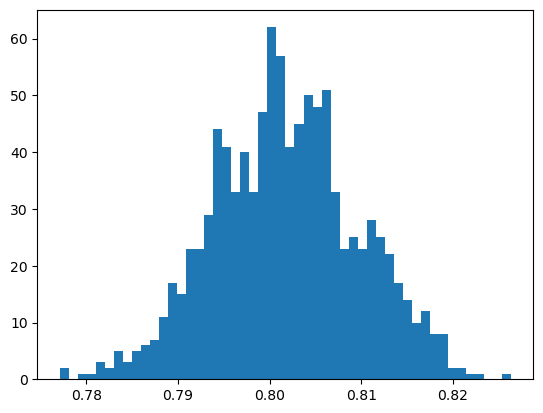

In [ ]:
plt.hist(bootstraped_scores, bins=50)
plt.show()

<AxesSubplot:>

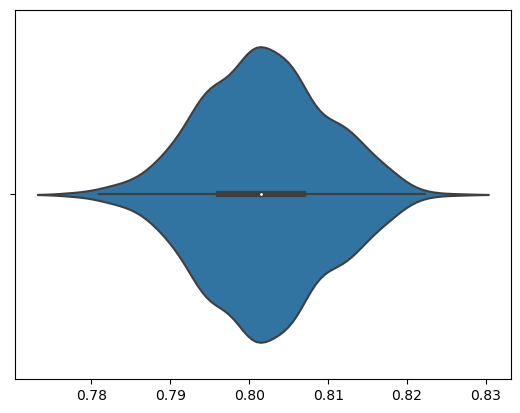

In [ ]:
sns.violinplot(x=bootstraped_scores)

In [ ]:
#auc_alg_5b = bootstraped_scores
#auc_alg_5a = bootstraped_scores
#auc_alg_4 = bootstraped_scores
auc_df = pd.DataFrame({'FULL':auc_alg_5b,
                       'No SES':auc_alg_5a,
                       'No prg':auc_alg_4})
auc_df

,FULL,No SES,No prg
0,0.883021,0.857052,0.798879
1,0.889139,0.871244,0.806550
2,0.880016,0.866958,0.805268
3,0.875337,0.847827,0.790466
4,0.873368,0.852948,0.800525
...,...,...,...
995,0.883655,0.867347,0.803682
996,0.873648,0.859129,0.791837
997,0.880079,0.874867,0.812770
998,0.879675,0.863927,0.802757


<AxesSubplot:>

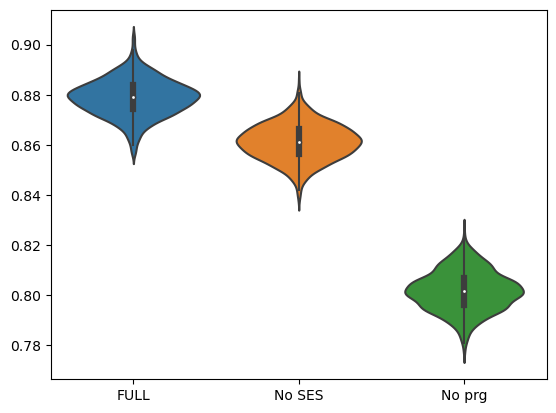

In [ ]:
sns.violinplot(data=auc_df)

In [ ]:
# LOOCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#y_pred = (rf.predict(X_test))
#print("roc_auc_score:",roc_auc_score(y_test, rf.predict(X_test)))

print("AUC", cross_val_score(rf, X, y, cv=KFold(10, shuffle=True), scoring="roc_auc"))

AUC [0.75258382 0.71867648 0.74249642 0.7544222  0.74163336 0.7589213
 0.74125968 0.78227262 0.78013806 0.75363356]


In [ ]:
rf.fit(X,y)
ypred = rf.predict(X)
AUC_Full = roc_auc_score(y,ypred)
AUC_Full

0.921366204692728

In [ ]:
from sklearn.utils import resamples

def bootstraps(X,y):
    while True:
        yeild resample (X,y)

def esttimate_optimism (model, X, y, nboot=100):
    ypred = model.predict(X)




In [ ]:
import pickle
#pickle.dump(rf, open(r'Z:\Tami - summaries\FA_6Y_no_prganti.sav','wb')) # AUC=83
pickle.dump(rf, open(r'Z:\Tami - summaries\FA_FULL.sav','wb')) # AUC=88

In [ ]:
threshold = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
#confusionM = list()
#fprs, tprs, scores = [], [], []
scores = []

for n in threshold:
    #for i in range(10):a
        labels = rf.predict(X_test) > n
        prob = rf.predict(X_test)
        report = classification_report(y_test,labels,output_dict=True)
        precision_value = report['1']['precision']
        recall_value = report['1']['recall']
        accuracy_value = report['accuracy']
        F1_score = report['1']['f1-score']
        fpr, tpr, thresholds = roc_curve(y_test, prob, pos_label=1)
        auc_score = roc_auc_score(y_test, rf.predict(X_test)) #auc(fpr, tpr)
        ci = 1.96 * np.std(tpr)/np.sqrt(len(fpr))
       # if i==1:
        cm = confusion_matrix(y_test,labels)
            #confusionM.append(cm)
        #fprs.append(fpr)
        #tprs.append(tpr)
        scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
        result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])#.mean()
result

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.10,0.103852,0.801427,0.725676,0.183877,0.834845,0.010989
1,0.15,0.133666,0.701546,0.813159,0.224548,0.834845,0.010989
2,0.20,0.165158,0.629013,0.863090,0.261622,0.834845,0.010989
3,0.25,0.181376,0.576694,0.883310,0.275960,0.834845,0.010989
4,0.30,0.210938,0.513674,0.907153,0.299065,0.834845,0.010989
5,0.40,0.274897,0.397146,0.936359,0.324903,0.834845,0.010989
6,0.50,0.343793,0.299643,0.950940,0.320203,0.834845,0.010989


In [ ]:
threshold = [0.1,0.12,0.15,0.2,0.25,0.3,0.4,0.5]
#confusionM = list()
scores = []

for n in threshold:
    #for i in range(10):
        labels = rf.predict(X_test) > n
        cm = confusion_matrix(y_test, labels)
        FP = cm[0][1]
        TN = cm[0][0]
        TP = cm[1][1]
        FN = cm[1][0]
        TH = n
        #if i==1:
        #confusionM.append(cm)
        scores.append([TH,FP,TN,TP,FN])
        result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result

,TH,FP,TN,TP,FN
0,0.10,4865,16085,603,257
1,0.12,3946,17004,562,298
2,0.15,3174,17776,520,340
3,0.20,2070,18880,440,420
4,0.25,1345,19605,366,494
5,0.30,876,20074,305,555
6,0.40,519,20431,231,629
7,0.50,278,20672,172,688


Text(0.5, 1.0, 'Feature importance - FA up to 6Y')

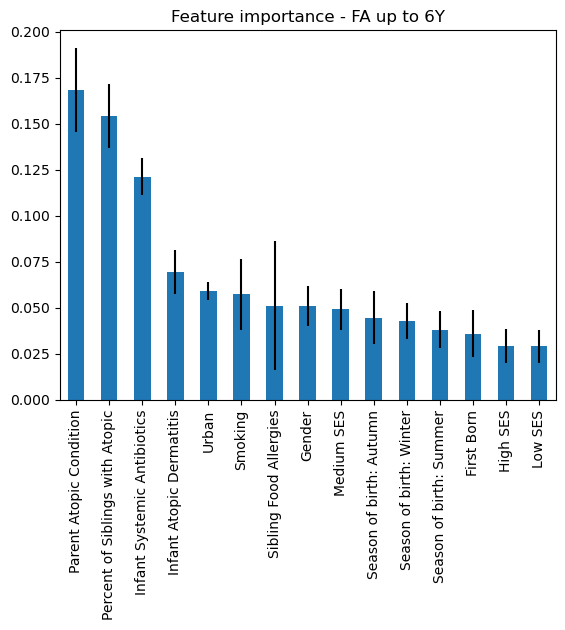

In [ ]:
model = rf
#model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

std = np.std([i.feature_importances_ for i in rf.estimators_], axis=0)

importances = rf.feature_importances_

feat_with_importance = pd.Series(importances, X.columns).nlargest(20)
fig, ax = plt.subplots()
feat_with_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance - FA up to 6Y")

In [ ]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

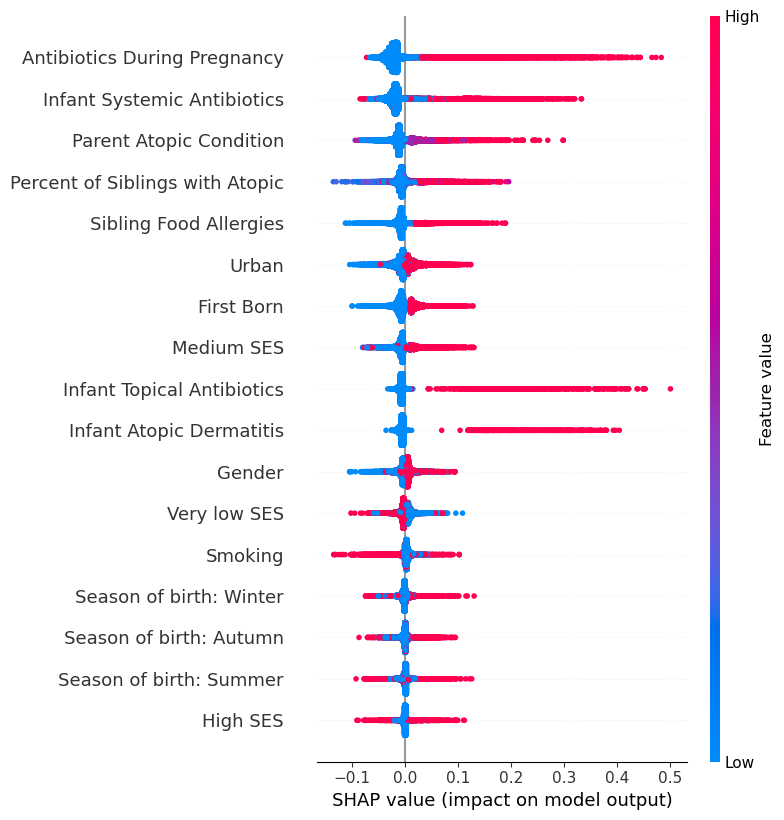

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values[0], X_test)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

## Standard of Care

In [ ]:
#  'Parent Atopic Condition'
df['Parent Atopic Condition'].value_counts()

0    50574
1    16354
2     4618
3     1049
4      103
Name: Parent Atopic Condition, dtype: int64

In [ ]:
df['Parental Atopic'] = np.where(df['Parent Atopic Condition']>0,1,0)
df['Parental Atopic'].value_counts()

0    50574
1    22124
Name: Parental Atopic, dtype: int64

In [ ]:
df[['Parental Atopic','Cohort']].value_counts()

Parental Atopic  Cohort
0                0         49131
1                0         20735
0                1          1443
1                1          1389
dtype: int64

In [ ]:
df[['Infant Atopic Dermatitis','Cohort']].value_counts()

Infant Atopic Dermatitis  Cohort
0                         0         68893
                          1          2527
1                         0           973
                          1           305
dtype: int64

In [ ]:

#### Only Parental Atopic:


t = df.Cohort
Z = df[[
   'Parental Atopic'
 ]]


Z = Z.apply(pd.to_numeric)



#### Only infant AD:


a = df.Cohort

B = df[[
 'Infant Atopic Dermatitis'
 ]]


B = B.apply(pd.to_numeric)

In [ ]:
Z_train, Z_test, t_train, t_test = train_test_split(Z, t, test_size=0.3) #, random_state=1) # 70% training and 30% test
B_train, B_test, a_train, a_test = train_test_split(B, a, test_size=0.3) #, random_state=1) # 70% training and 30% test


In [ ]:
Z_train, Z_test, t_train, t_test = train_test_split(Z, t, test_size=0.3) #, random_state=1) # 70% training and 30% test

rf = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=15, random_state=35)
#rf = DecisionTreeClassifier()

rf.fit(Z_train,t_train)
t_pred = (rf.predict(Z_test) > 0.05).astype('float')

rf_matrix = confusion_matrix(t_test, t_pred)
print ("Parental Atopic")
print(rf_matrix)
print(classification_report(t_test, t_pred))
print("Accuracy:",metrics.accuracy_score(t_test, t_pred))
print("Precision:",metrics.precision_score(t_test, t_pred))
print("Recall:",metrics.recall_score(t_test, t_pred))
print("roc_auc_score:",roc_auc_score(t_test, rf.predict(Z_test)))

#roc_auc_ci (t_test, rf.predict(Z_test), positive=1)

Parental Atopic
[[14715  6244]
 [  459   392]]
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     20959
           1       0.06      0.46      0.10       851

    accuracy                           0.69     21810
   macro avg       0.51      0.58      0.46     21810
weighted avg       0.93      0.69      0.79     21810

Accuracy: 0.6926639156350298
Precision: 0.05907172995780591
Recall: 0.4606345475910693
roc_auc_score: 0.5813597853657432


In [ ]:
t_pred = rf.predict(Z_train)

auc_prnt = pd.DataFrame(np.column_stack([y_pred,t_test]),
                      columns=['prnt_y_pred','prnt_y_test'])

auc_prnt.to_csv('Z:\\Tami - summaries\\auc_prnt.csv')

In [ ]:
B_train, B_test, a_train, a_test = train_test_split(B, a, test_size=0.3) #, random_state=1) # 70% training and 30% test

rf2 = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=15, random_state=35)

rf2.fit(B_train,a_train)
a_pred = (rf2.predict(B_test) > 0.1).astype('float')


rf_matrix = confusion_matrix(a_test, a_pred)
print ("Infant AD")
print(classification_report(a_test, a_pred))
print("Accuracy:",metrics.accuracy_score(a_test, a_pred))
print("Precision:",metrics.precision_score(a_test, a_pred))
print("Recall:",metrics.recall_score(a_test, a_pred))
print("roc_auc_score:",roc_auc_score(a_test, rf2.predict(B_test)))


#roc_auc_ci (a_test, rf2.predict(B_test), positive=1)

Infant AD
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21011
           1       0.24      0.11      0.15       799

    accuracy                           0.95     21810
   macro avg       0.60      0.55      0.56     21810
weighted avg       0.94      0.95      0.95     21810

Accuracy: 0.9549289316827143
Precision: 0.24157303370786518
Recall: 0.10763454317897372
roc_auc_score: 0.5473920657449293


NameError: name 'roc_auc_ci' is not defined

In [ ]:
a_pred = rf2.predict(B_test)

auc_iAd = pd.DataFrame(np.column_stack([a_pred,a_test]),
                      columns=['iad_y_pred','iad_y_test'])

auc_iAd.to_csv('Z:\\Tami - summaries\\auc_iAd.csv')

In [ ]:
from scipy.stats import sem

ytest = a_test
ytest_len = len(ytest)
indices = range(ytest_len)
ytest.index = indices

X_test = B_test

model = rf2

y_pred = model.predict(X_test)

n_bootstraps = 1000
rng_seed = 42
bootstraped_scores = []

print ("Original AUC: {:0.3f}".format(roc_auc_score(ytest,y_pred)))

rng = np.random.RandomState(rng_seed)
for i in range (n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    score = roc_auc_score(ytest[indices], y_pred[indices])
    bootstraped_scores.append(score)
    print("Bootstrap #{} AUC: {:0.3f}".format(i+1,score))

Original AUC: 0.545
Bootstrap #1 AUC: 0.543
Bootstrap #2 AUC: 0.540
Bootstrap #3 AUC: 0.544
Bootstrap #4 AUC: 0.544
Bootstrap #5 AUC: 0.547
Bootstrap #6 AUC: 0.537
Bootstrap #7 AUC: 0.538
Bootstrap #8 AUC: 0.541
Bootstrap #9 AUC: 0.550
Bootstrap #10 AUC: 0.535
Bootstrap #11 AUC: 0.551
Bootstrap #12 AUC: 0.544
Bootstrap #13 AUC: 0.546
Bootstrap #14 AUC: 0.549
Bootstrap #15 AUC: 0.557
Bootstrap #16 AUC: 0.554
Bootstrap #17 AUC: 0.538
Bootstrap #18 AUC: 0.533
Bootstrap #19 AUC: 0.542
Bootstrap #20 AUC: 0.549
Bootstrap #21 AUC: 0.544
Bootstrap #22 AUC: 0.541
Bootstrap #23 AUC: 0.540
Bootstrap #24 AUC: 0.535
Bootstrap #25 AUC: 0.543
Bootstrap #26 AUC: 0.543
Bootstrap #27 AUC: 0.535
Bootstrap #28 AUC: 0.545
Bootstrap #29 AUC: 0.544
Bootstrap #30 AUC: 0.547
Bootstrap #31 AUC: 0.548
Bootstrap #32 AUC: 0.544
Bootstrap #33 AUC: 0.545
Bootstrap #34 AUC: 0.543
Bootstrap #35 AUC: 0.538
Bootstrap #36 AUC: 0.546
Bootstrap #37 AUC: 0.547
Bootstrap #38 AUC: 0.551
Bootstrap #39 AUC: 0.545
Bootstrap #40 

In [ ]:
sorted_scores = np.array(bootstraped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]

print(confidence_lower, confidence_upper)

0.5366757875212064 0.552674507720729


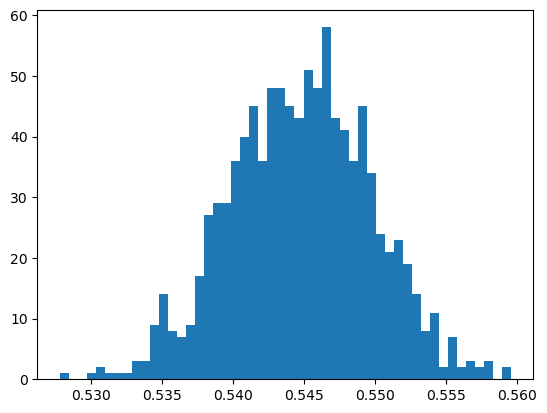

In [ ]:
plt.hist(bootstraped_scores, bins=50)
plt.show()

In [ ]:
#auc_alg_5b = bootstraped_scores
#auc_alg_5a = bootstraped_scores
#auc_alg_4 = bootstraped_scores
#auc_parental = bootstraped_scores
#auc_infantAD = bootstraped_scores

auc_df = pd.DataFrame({'FULL':auc_alg_5b,
                       'No SES':auc_alg_5a,
                       'No prg':auc_alg_4,
                      'Parental Atopic':auc_parental,
                      'Infant AD':auc_infantAD})
auc_df

,FULL,No SES,No prg,Parental Atopic,Infant AD
0,0.883021,0.857052,0.798879,0.582837,0.543335
1,0.889139,0.871244,0.806550,0.581551,0.539664
2,0.880016,0.866958,0.805268,0.587479,0.543761
3,0.875337,0.847827,0.790466,0.586005,0.543870
4,0.873368,0.852948,0.800525,0.589405,0.547249
...,...,...,...,...,...
995,0.883655,0.867347,0.803682,0.576331,0.548805
996,0.873648,0.859129,0.791837,0.572546,0.535133
997,0.880079,0.874867,0.812770,0.576686,0.546758
998,0.879675,0.863927,0.802757,0.588157,0.541389


In [ ]:
auc_df.to_csv('Z:\\Tami - summaries\\auc_bootstrap.csv')

Text(0.5, 1.0, '6Y Algorithms')

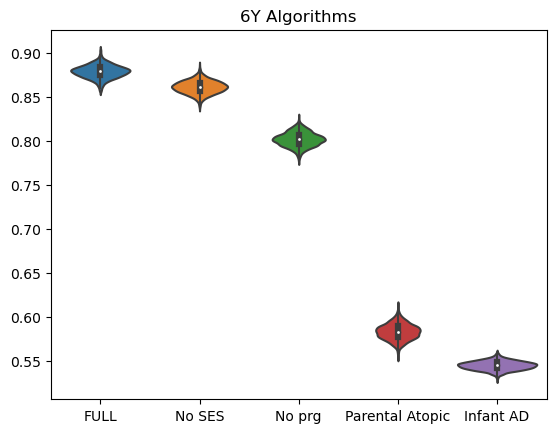

In [ ]:
sns.violinplot(data=auc_df).set_title("6Y Algorithms")

In [ ]:
fpr, tpr, thresholds = roc_curve(t_test, prob, pos_label=1)
auc_score = roc_auc_score(t_test, rf.predict(Z_test)) #auc(fpr, tpr)
ci = 1.96 * np.std(tpr)/np.sqrt(len(fpr))
ci

0.015281821625903623

In [ ]:
threshold = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
#confusionM = list()
scores = []

for n in threshold:
    #for i in range(10):
        labels = rf.predict(Z_test) > n
        cm = confusion_matrix(t_test, labels)
        FP = cm[0][1]
        TN = cm[0][0]
        TP = cm[1][1]
        FN = cm[1][0]
        TH = n
        #if i==1:
        #confusionM.append(cm)
        scores.append([TH,FP,TN,TP,FN])
        result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result

,TH,FP,TN,TP,FN
0,0.10,0,20998,0,812
1,0.15,0,20998,0,812
2,0.20,0,20998,0,812
3,0.25,0,20998,0,812
4,0.30,0,20998,0,812
5,0.40,0,20998,0,812
6,0.50,0,20998,0,812


In [ ]:
rf2 = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=15, random_state=35)

rf2.fit(B_train,a_train)
a_pred = (rf.predict(B_test) > 0.05).astype('float')


rf_matrix = confusion_matrix(a_test, a_pred)
print ("Infant AD")
print(classification_report(a_test, a_pred))
print("Accuracy:",metrics.accuracy_score(a_test, a_pred))
print("Precision:",metrics.precision_score(a_test, a_pred))
print("Recall:",metrics.recall_score(a_test, a_pred))
print("roc_auc_score:",roc_auc_score(a_test, rf2.predict(B_test)))


roc_auc_ci (a_test, rf2.predict(B_test), positive=1)

Infant AD
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     20930
           1       0.24      0.10      0.14       880

    accuracy                           0.95     21810
   macro avg       0.60      0.54      0.56     21810
weighted avg       0.93      0.95      0.94     21810

Accuracy: 0.9505272810637322
Precision: 0.2388451443569554
Recall: 0.10340909090909091
roc_auc_score: 0.5447766907006039


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Infant Atopic Dermatitis
Feature names seen at fit time, yet now missing:
- Parental Atopic

  warnings.warn(message, FutureWarning)


(0.52, 0.56)

In [ ]:
fpr, tpr, thresholds = roc_curve(a_test, prob, pos_label=1)
auc_score = roc_auc_score(a_test, rf2.predict(B_test)) #auc(fpr, tpr)
ci = 1.96 * np.std(tpr)/np.sqrt(len(fpr))
ci

0.01478953632408667

In [ ]:
threshold = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
#confusionM = list()
scores = []

for n in threshold:
    #for i in range(10):
        labels = rf2.predict(B_test) > n
        cm = confusion_matrix(a_test, labels)
        FP = cm[0][1]
        TN = cm[0][0]
        TP = cm[1][1]
        FN = cm[1][0]
        TH = n
        #if i==1:
        #confusionM.append(cm)
        scores.append([TH,FP,TN,TP,FN])
        result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result

,TH,FP,TN,TP,FN
0,0.10,283,20657,103,767
1,0.15,283,20657,103,767
2,0.20,283,20657,103,767
3,0.25,0,20940,0,870
4,0.30,0,20940,0,870
5,0.40,0,20940,0,870
6,0.50,0,20940,0,870


## Running saved algorithms

In [ ]:
# 6Y algorithm - No Maternal antibiotics, No SES

import pickle

file = open(r'Z:\Tami - summaries\FA_6YO_no_ses.sav','rb')
model = pickle.load(file)

In [ ]:
# 6Y algorithm - with Maternal antibiotics,No SES

file = open(r'Z:\Tami - summaries\.sav','rb')
model = pickle.load(file)

In [ ]:
# 6Y algorithm - No Maternal antibiotics, with SES

file = open(r'Z:\Tami - summaries\FA_6Y_no_prganti.sav','rb')
model = pickle.load(file)

In [ ]:
# 6Y algorithm - Full

file = open(r'Z:\Tami - summaries\FA_AUC87.sav','rb')
model = pickle.load(file)

In [ ]:
model.feature_names_in_

array(['Gender', 'Urban', 'Very low SES', 'Medium SES', 'High SES',
       'Smoking', 'Parent Atopic Condition', 'First Born',
       'Sibling Food Allergies', 'Percent of Siblings with Atopic',
       'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics',
       'Infant Topical Antibiotics', 'Antibiotics During Pregnancy',
       'Season of birth: Autumn', 'Season of birth: Summer',
       'Season of birth: Winter'], dtype=object)

In [ ]:
y = df.Cohort

X = df[['Gender',
 'Urban',
 "Very low SES",
#'Low SES',
 'Medium SES',
 'High SES',
 'Smoking',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
 'Infant Systemic Antibiotics', # variable post birth
 'Infant Topical Antibiotics',  # variable post birth
 'Antibiotics During Pregnancy',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]]

X = X.apply(pd.to_numeric)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,auc, classification_report


TH = 0.115
y_pred = (model.predict(X) > TH).astype('float')


#model result
rf_matrix = confusion_matrix(y, y_pred)
print(rf_matrix)
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print("roc_auc_score:",roc_auc_score(y, model.predict(X)))

[[55937 13929]
 [  555  2277]]
Accuracy: 0.8007648078351537
Precision: 0.14050351721584597
Recall: 0.8040254237288136
roc_auc_score: 0.876852287231522


In [ ]:
threshold = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in threshold:
        labels = model.predict(X) > n
        prob = model.predict(X)
        report = classification_report(y,labels,output_dict=True)
        precision_value = report['1']['precision']
        recall_value = report['1']['recall']
        accuracy_value = report['accuracy']
        F1_score = report['1']['f1-score']
        fpr, tpr, thresholds = roc_curve(y, prob, pos_label=1)
        auc_score = roc_auc_score(y, model.predict(X)) #auc(fpr, tpr)
        ci = 1.96 * np.std(tpr)/np.sqrt(len(fpr))
       # if i==1:
        cm = confusion_matrix(y,labels)
        scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
        result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])#.mean()
result

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.10,0.129996,0.823446,0.778440,0.224544,0.876852,0.009616
1,0.15,0.160566,0.772952,0.833737,0.265897,0.876852,0.009616
2,0.20,0.193966,0.719633,0.872582,0.305570,0.876852,0.009616
3,0.25,0.220279,0.685028,0.893271,0.333362,0.876852,0.009616
4,0.30,0.249798,0.653955,0.910011,0.361507,0.876852,0.009616
5,0.40,0.321287,0.571328,0.936284,0.411286,0.876852,0.009616
6,0.50,0.392648,0.497881,0.950439,0.439047,0.876852,0.009616


In [ ]:
threshold = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
#confusionM = list()
scores = []

for n in threshold:
    #for i in range(10):
        labels = model.predict(X) > n
        cm = confusion_matrix(y, labels)
        FP = cm[0][1]/4
        TN = cm[0][0]/4
        TP = cm[1][1]/4
        FN = cm[1][0]/4
        TH = n
        #if i==1:
        #confusionM.append(cm)
        scores.append([TH,FP,TN,TP,FN])
        result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result

,TH,FP,TN,TP,FN
0,0.10,3901.75,13564.75,583.00,125.00
1,0.15,2861.00,14605.50,547.25,160.75
2,0.20,2117.25,15349.25,509.50,198.50
3,0.25,1716.75,15749.75,485.00,223.00
4,0.30,1390.50,16076.00,463.00,245.00
5,0.40,854.50,16612.00,404.50,303.50
6,0.50,545.25,16921.25,352.50,355.50


In [ ]:
df.AD.value_counts()

AttributeError: 'DataFrame' object has no attribute 'AD'